# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`
* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Personal comments: here I'm just importing the libraries.

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [3]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

Personal comments: here I just read the file and then selected the relevant features.

Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

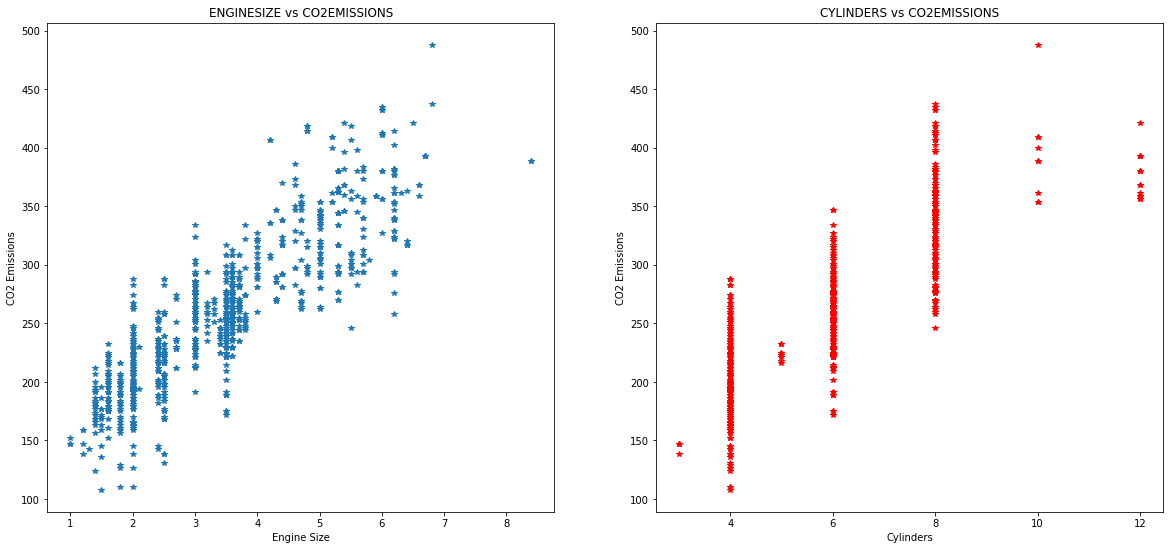

In [4]:
plt.figure(figsize=(20, 9))

plt.subplot(121)
plt.plot(df.sort_values("ENGINESIZE")["ENGINESIZE"], df.sort_values("ENGINESIZE")["CO2EMISSIONS"], "*")
plt.title("ENGINESIZE vs CO2EMISSIONS")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

plt.subplot(122)
plt.plot(df.sort_values("CYLINDERS")["CYLINDERS"], df.sort_values("CYLINDERS")["CO2EMISSIONS"], "*r")
plt.title("CYLINDERS vs CO2EMISSIONS")
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")

plt.show()

Personal comments: by plotting the data, some sort of linearity can be seen. The emissions are clearly increasing as a function of the engine size and the cylinders. Though there's clearly a lot of variance, because it is obviously not linear, but a linear approximation can be useful.

<h2 id="reading_data">Visualize the data in 3D</h2>

Text(0.5, 0.92, 'ENGINESIZE and CYLINDERS vs CO2EMISSIONS')

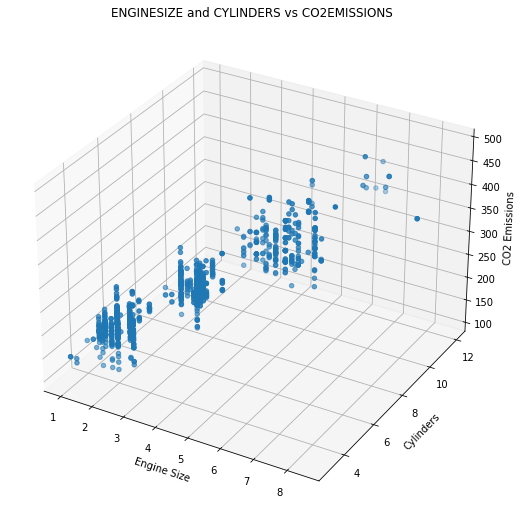

In [5]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(df["ENGINESIZE"], df["CYLINDERS"], df["CO2EMISSIONS"])
ax.set_xlabel("Engine Size")
ax.set_ylabel("Cylinders")
ax.set_zlabel("CO2 Emissions")
ax.set_title("ENGINESIZE and CYLINDERS vs CO2EMISSIONS")

Personal comments: the linear version of a 3D plot is a plane, and the points here graphed can be seen forming some sort of plane. Again, some type of linearity can be seen, although it is not perfect, but it can be useful.

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [6]:
feature_scaled = False
processed_df = df.copy()

#========================================================
# THE NEXT FOUR LINES CAN BE COMMENTED TO TURN ON AND OFF
feature_scaled = True
df_means = processed_df.mean()
df_stds = processed_df.std()
processed_df = (processed_df - df_means) / df_stds
#========================================================

processed_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,-0.950846,-0.998500,-0.828169,-0.992876,-0.883890,-0.950394
1,-0.668339,-0.998500,-0.511193,-0.635031,-0.568305,-0.555900
2,-1.303979,-0.998500,-1.779098,-1.314936,-1.629817,-1.897180
3,0.108555,0.114189,-0.145451,-0.134049,-0.137962,-0.019388
4,0.108555,0.114189,-0.291748,-0.277187,-0.281410,-0.192966
...,...,...,...,...,...,...
1062,-0.244579,0.114189,0.025228,0.116442,0.062864,0.233088
1063,-0.103325,0.114189,-0.023537,0.009089,-0.023204,0.122630
1064,-0.244579,0.114189,0.025228,0.116442,0.062864,0.233088
1065,-0.103325,0.114189,-0.096686,-0.062480,-0.080583,0.059511


Personal comments: no pre-made function was used for feature scaling. Here I simply used the formula given for scaling, which is $\bar{x} = \frac{(x^{i} - u)} {s}$, using numpy `mean` and `std` functions, and saved the values for possible scaling back later.

# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_data_df = processed_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y_data_df = processed_df[['CO2EMISSIONS']]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_data_df, y_data_df, test_size=0.2)
print ('Train set:', X_train_df.shape,  y_train_df.shape)
print ('Test set:', X_test_df.shape,  y_test_df.shape)

Train set: (853, 5) (853, 1)
Test set: (214, 5) (214, 1)


Personal comments: here I just used sklearn's function for splitting the data.

<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [9]:
from sklearn import linear_model

In [10]:
regr = linear_model.LinearRegression()

X_train = X_train_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']].to_numpy()
y_train = y_train_df[['CO2EMISSIONS']].to_numpy()

regr.fit(X_train, y_train)

LinearRegression()

Personal comments: here the model was trained with the training data.

As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

In [11]:
X_test = X_test_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']].to_numpy()
y_test = y_test_df[['CO2EMISSIONS']].to_numpy()

R2 = regr.score(X_test, y_test)
print("R2 = ", R2)

R2 =  0.8611033156798354


Personal comments: the R2 value is good given how close it is to 1. An 0.84 means the model is capable of explaining 84% of the variance of the data.

<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [12]:
preds = regr.predict(X_test)

print("Mean Average Error (MAE): %.2f" % np.mean(np.absolute(preds - y_test)))
print("Mean absolute percentual error (MAPE): %.2f" % np.mean(np.absolute((y_test - preds) / y_test)))
print("R2-score: %.2f" % regr.score(X_test, y_test))

Mean Average Error (MAE): 0.27
Mean absolute percentual error (MAPE): 1.62
R2-score: 0.86


Personal comments: here the MAPE is really big, but that only happens when the data was normalized. This can be explained because of the outliers, given that there are a lot of outliers that bring the MAPE way too up. The MAE is low though, which is good, considering the outliers and that the normalized predictions are usually between -1 and 1. And the R2 is the same than before. I'll graph the predictions for all features to see how good is the fit, which will be seen that it is pretty good (this wasn't an item in the assignment, and it's just to show that the MAPE being high is not a problem):

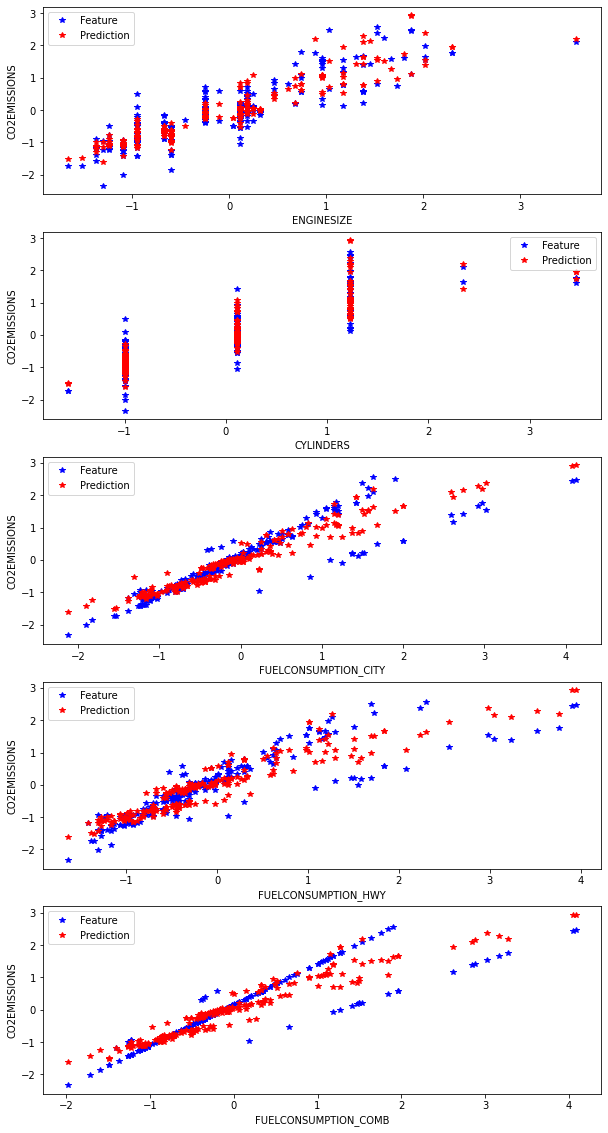

In [13]:
plt.figure(figsize=(10, 20))
for i in range(5):
    plt.subplot(5,1,i+1)
    pred = regr.predict(X_test)
    Xthing, ything, pred = zip(*sorted(zip(X_test[:,i], y_test, pred)))
    plt.plot(Xthing, ything, "*b", label="Feature")
    plt.plot(Xthing, pred, "*r", label="Prediction")
    plt.xlabel(df.columns.values[i])
    plt.ylabel("CO2EMISSIONS")
    plt.legend()

<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [14]:
random_indexes = np.random.randint(0, len(X_test), 10)

for index in random_indexes:
    x_car = X_test_df.iloc[index]
    y_car = y_test_df.iloc[index]
    pred_car = regr.predict([x_car.to_numpy()])

    # No need to comment this, if the previous feature scaling section was
    # commented, this won't run.
    if feature_scaled:
        x_car = x_car * df_stds[:5] + df_means[:5]
        y_car = y_car * df_stds[5] + df_means[5]
        pred_car = pred_car * df_stds[5] + df_means[5]


    print("The car with these characteristics: ")
    print(x_car)
    print("has this real CO2 emission: ", y_car[0])
    print("and this is the generated prediction: ", pred_car[0][0])
    print("==========================================")

The car with these characteristics: 
ENGINESIZE              1.6
CYLINDERS               4.0
FUELCONSUMPTION_CITY    9.1
FUELCONSUMPTION_HWY     6.7
FUELCONSUMPTION_COMB    8.0
dtype: float64
has this real CO2 emission:  184.0
and this is the generated prediction:  189.1183450195224
The car with these characteristics: 
ENGINESIZE               5.4
CYLINDERS                8.0
FUELCONSUMPTION_CITY    24.5
FUELCONSUMPTION_HWY     18.0
FUELCONSUMPTION_COMB    21.6
dtype: float64
has this real CO2 emission:  346.0
and this is the generated prediction:  392.55737801585656
The car with these characteristics: 
ENGINESIZE               3.5
CYLINDERS                6.0
FUELCONSUMPTION_CITY    12.6
FUELCONSUMPTION_HWY      9.1
FUELCONSUMPTION_COMB    11.0
dtype: float64
has this real CO2 emission:  253.0
and this is the generated prediction:  253.64917058013435
The car with these characteristics: 
ENGINESIZE              2.5
CYLINDERS               4.0
FUELCONSUMPTION_CITY    9.8
FUELCONSUMPTION

Personal comments: the results here as good. The predicted data is close to the real data for most cars, which means the linear approximation was a good model in this particular problem.

<h2 id="prediction">Compare results with single feature prediction</h2>

Now each one of the single feature will be used to do the prediction:

In [15]:
print("The results of the full regression for comparison are:")
print("Mean Average Error (MAE): %.2f" % np.mean(np.absolute(preds - y_test)))
print("Mean absolute percentual error (MAPE): %.2f" % np.mean(np.absolute((y_test - preds) / y_test)))
print("R2-score: %.2f" % regr.score(X_test, y_test))
print("===============================")

for feature in ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']:
    regr_one_feat = linear_model.LinearRegression()
    X_train_one_feat = X_train_df[[feature]].to_numpy()
    regr_one_feat.fit(X_train_one_feat, y_train)
    X_test_one_feat = X_test_df[[feature]].to_numpy()
    preds_one_feat = regr_one_feat.predict(X_test_one_feat)
    print("The results for feature " + feature + " are:")
    print("Mean Average Error (MAE): %.2f" % np.mean(np.absolute(preds_one_feat - y_test)))
    print("Mean absolute percentual error (MAPE): %.2f" % np.mean(np.absolute((y_test - preds_one_feat) / y_test)))
    print("R2-score: %.2f" % regr_one_feat.score(X_test_one_feat, y_test))


The results of the full regression for comparison are:
Mean Average Error (MAE): 0.27
Mean absolute percentual error (MAPE): 1.62
R2-score: 0.86
The results for feature ENGINESIZE are:
Mean Average Error (MAE): 0.37
Mean absolute percentual error (MAPE): 1.24
R2-score: 0.75
The results for feature CYLINDERS are:
Mean Average Error (MAE): 0.40
Mean absolute percentual error (MAPE): 1.06
R2-score: 0.72
The results for feature FUELCONSUMPTION_CITY are:
Mean Average Error (MAE): 0.30
Mean absolute percentual error (MAPE): 2.02
R2-score: 0.79
The results for feature FUELCONSUMPTION_HWY are:
Mean Average Error (MAE): 0.37
Mean absolute percentual error (MAPE): 2.71
R2-score: 0.73
The results for feature FUELCONSUMPTION_COMB are:
Mean Average Error (MAE): 0.31
Mean absolute percentual error (MAPE): 2.28
R2-score: 0.78


Personal comments: the model using all variables gives better MAE, MAPE and better R2 in all cases. It can be concluded that the multi-feature model is the best option for this problem, which makes sense given that it has access to a lot more information.